# Cargamos Housing Dataset

In [22]:
import pandas as pd
import numpy as np

## Descripción del dataset *Boston Housing*

Cada registro del dataset describe un suburbio o municipio de Boston.  
Los datos fueron recolectados en el área metropolitana estándar de Boston (Boston Standard Metropolitan Statistical Area, SMSA) en 1970.  
Las variables se definen de la siguiente manera (según el repositorio UCI Machine Learning Repository):

- **CRIM**: tasa de criminalidad per cápita por municipio.  
- **ZN**: proporción de terreno residencial zonificado para lotes de más de 25.000 pies cuadrados.  
- **INDUS**: proporción de acres dedicados a negocios no minoristas por municipio.  
- **CHAS**: variable ficticia (dummy) del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario).  
- **NOX**: concentración de óxidos nítricos (partes por 10 millones).  
- **RM**: número promedio de habitaciones por vivienda.  
- **AGE**: proporción de viviendas ocupadas por sus propietarios construidas antes de 1940.  
- **DIS**: distancias ponderadas a cinco centros de empleo de Boston.  
- **RAD**: índice de accesibilidad a autopistas radiales.  
- **TAX**: tasa del impuesto a la propiedad por cada 10.000 dólares.  
- **PTRATIO**: relación alumno-profesor por municipio.  
- **B**: 1000 × (Bk − 0.63)², donde *Bk* es la proporción de población negra por municipio.  
- **LSTAT**: porcentaje de la población con estatus socioeconómico bajo.  
- **MEDV**: valor mediano de las viviendas ocupadas por sus propietarios (en miles de dólares).


In [18]:
df = pd.read_csv(r'../data/HousingData.csv')
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# Shape del dataset
print(f"Cantidad de filas: {df.shape[0]}, Cantidad de columnas: {df.shape[1]}")
# Columnas del dataset
print(f"Columnas: {df.columns.tolist()}")
# Cantidad de nulos
print(f"Cantidad de nulos por variable:\n{df.isnull().sum()}")

Cantidad de filas: 506, Cantidad de columnas: 14
Columnas: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Cantidad de nulos por variable:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


# Gráficas

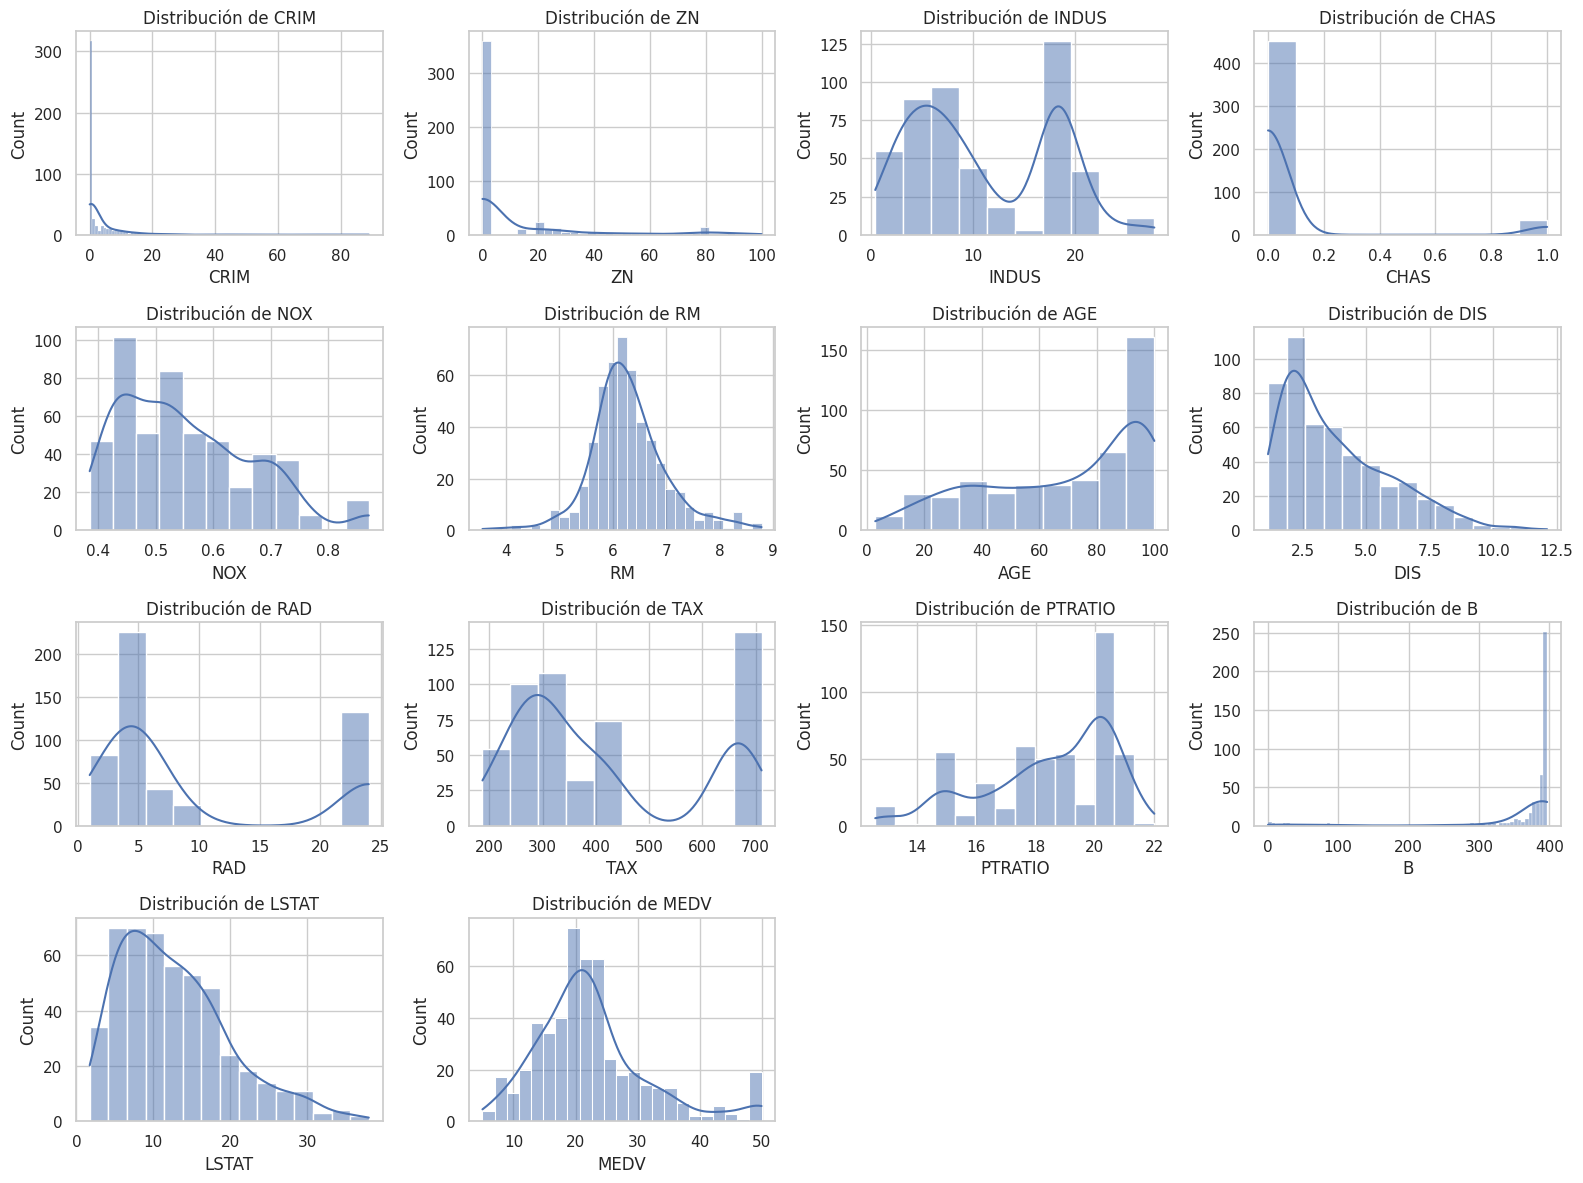

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos estilo
sns.set(style="whitegrid")

features = df.columns.tolist()

# Creamos grilla para histograms
n_cols = 4
n_rows = int(len(features) / n_cols) + 1

plt.figure(figsize=(16, 12))
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


## Análisis exploratorio: Distribución individual de variables

Se generaron histogramas con estimación de densidad (KDE) para todas las variables del dataset con el fin de:

- Identificar sesgos (skewness)  
- Detectar posibles outliers  
- Comprender escalas y rangos  
- Evaluar si pueden requerirse transformaciones (ej: log) o normalización

### Hallazgos relevantes por categoría de variable:

#### Variables fuertemente sesgadas hacia valores bajos (cola derecha larga):
- `CRIM`, `ZN`, `DIS`, `LSTAT`, `RAD`  
  Estas variables presentan concentración en valores bajos y algunas observaciones muy altas. Esto podría motivar transformaciones logarítmicas si se decide usar modelos sensibles a la escala o colas largas (como modelos lineales).

#### Variables discretas o categóricas codificadas como numéricas:
- `CHAS` (binaria 0/1 con fuerte desbalance hacia 0)  
- `RAD` tiene comportamiento de tipo entero con pocos valores dominantes → se debe considerasr si tratarla como categórica o mantenerla como numérica discreta.

####  Variables aproximadamente simétricas:
- `RM` (número medio de habitaciones) muestra distribución cercana a normal → podría ser adecuada para modelos lineales sin transformación.

#### Variables con distribución multimodal o irregular:
- `INDUS`, `AGE`, `PTRATIO`, `TAX` presentan estructuras algo multimodales o irregulares, lo cual sugiere patrones heterogéneos en los vecindarios.

#### Variable objetivo `MEDV`:
- Tiene forma aproximadamente normal, pero con ligera cola izquierda y techo máximo en 50 (posible censura).
- Esto podría influir en las métricas de evaluación y justificar luego la búsqueda de modelos más robustos o que manejen censura.

### Conclusiones preliminares:

- Existen variables con clara asimetría y outliers (ej. `CRIM`, `LSTAT`), lo cual debe considerarse para el modelado.  
- `RM` parece ser una variable particularmente bien comportada, potencialmente relevante.  
- `CHAS` y posiblemente `RAD` pueden tratarse como categóricas según el modelo elegido.  
- La variable objetivo `MEDV` parece razonablemente adecuada para regresión, aunque se debe tener en cuenta la posible censura en 50.

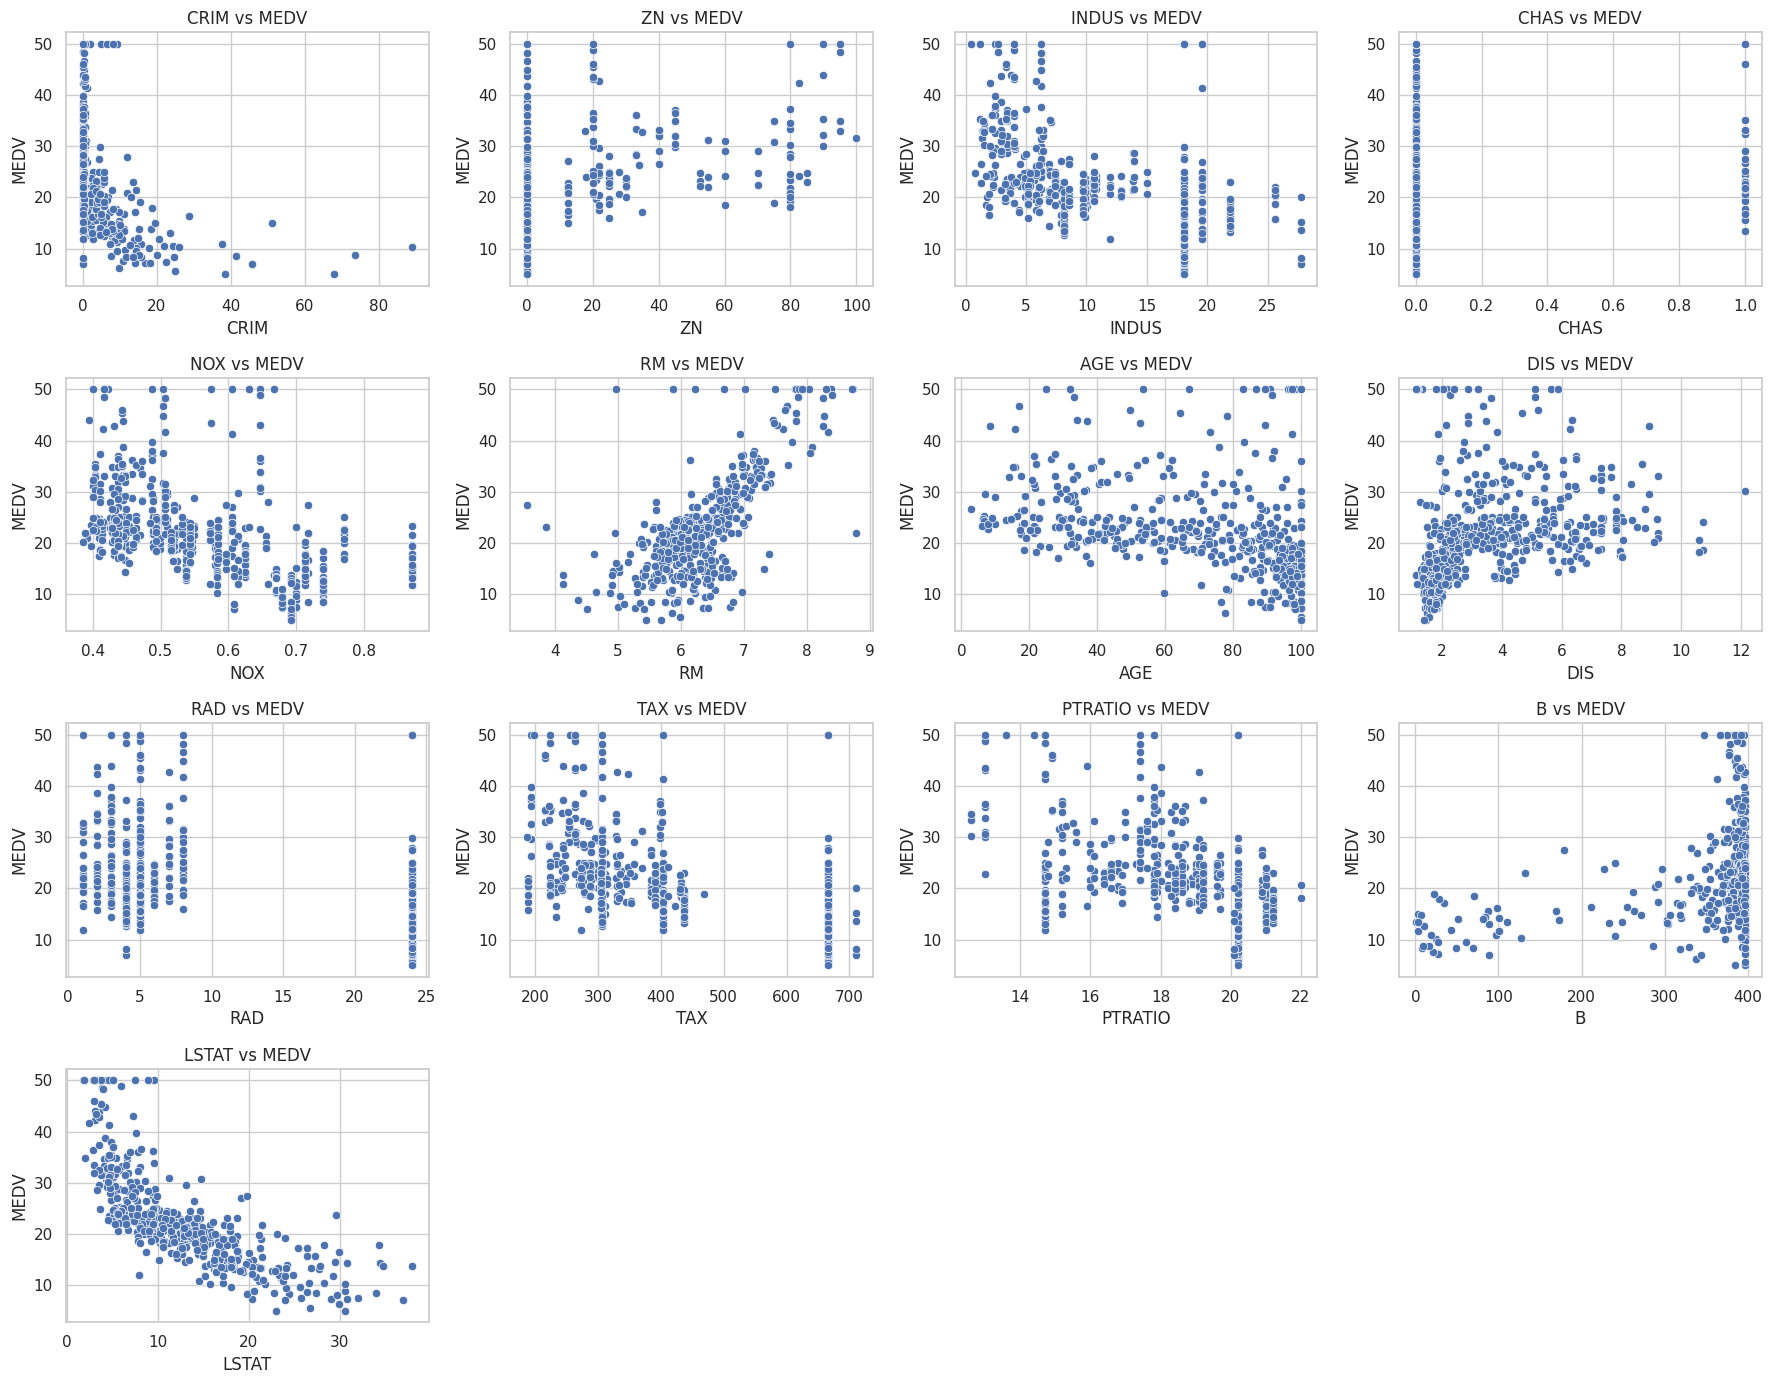

In [ ]:
sns.set(style="whitegrid")
features = [col for col in df.columns if col != "MEDV"]

n_cols = 4
n_rows = int(len(features) // n_cols) + 1

plt.figure(figsize=(18, 14))
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=df[col], y=df["MEDV"])
    plt.title(f"{col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")

plt.tight_layout()
plt.show()


## Análisis bivariante: Relación de cada variable con MEDV

Se generaron gráficos *scatter* entre cada variable predictora y la variable objetivo `MEDV`, con el propósito de:

- Identificar relaciones lineales o no lineales  
-  Determinar qué variables parecen más predictivas  
- Visualizar dispersión y ruido  
- Observar posibles outliers con fuerte influencia  

### Variables con relación clara (alta relevancia potencial):

| Variable | Relación con MEDV | Interpretación |
|----------|------------------|----------------|
| **RM** (promedio de habitaciones) | Positiva y aproximadamente lineal | A mayor número de habitaciones, mayor precio. Buen candidato para modelos lineales. |
| **LSTAT** (% de población con bajo estatus) | Negativa y relativamente fuerte | A mayor pobreza, menor valor de vivienda. Relación casi lineal decreciente, aunque con cierta dispersión. |

Estas dos variables muestran una tendencia visual clara y serán probablemente relevantes en el modelo.

---

###  Variables con posible relación, pero más ruidosa:

| Variable | Observación |
|----------|------------|
| **NOX**, **DIS**, **PTRATIO**, **TAX**, **INDUS**, **AGE** | Se observan patrones débiles o parcialmente no lineales. El efecto podría capturarse mejor con modelos no lineales o combinaciones de variables. |
| **B** | Hay cierta concentración de valores altos asociada a precios mayores, pero el patrón es irregular. |

---

###  Variables con comportamiento poco informativo visualmente:

| Variable | Motivo |
|----------|--------|
| **ZN**, **RAD**, **CHAS** | Se observan agrupaciones discretas sin una tendencia clara a lo largo del eje de `MEDV`. Podrían ser útiles como variables categóricas o contextuales, pero no muestran una clara relación lineal. |

---

### Conclusiones iniciales para el modelado:

- `RM` y `LSTAT` se perfilan como las variables predictoras más fuertes visualmente.  
- La tendencia lineal observada en estas variables justifica comenzar con un **modelo lineal como baseline** (por ejemplo, `LinearRegression`).  
- Algunas variables podrían beneficiarse de transformaciones (por ejemplo, escala logarítmica o estandarización) para estabilizar la relación con el target.  
- Dado que varios predictores muestran relaciones no lineales o discretas, un segundo modelo de referencia como `RandomForestRegressor` podría ser una buena opción de comparación en la etapa experimental.  


In [ ]:
# Seleccionamos columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calculamos matriz de correlación
corr_matrix = numeric_df.corr()

# Obtenemos correlaciones con MEDV, ordenadas
corr_with_target = corr_matrix["MEDV"].sort_values(key=lambda x: abs(x), ascending=False)
corr_with_target


MEDV       1.000000
LSTAT     -0.735822
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.481772
TAX       -0.468536
NOX       -0.427321
AGE       -0.394656
CRIM      -0.391363
RAD       -0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

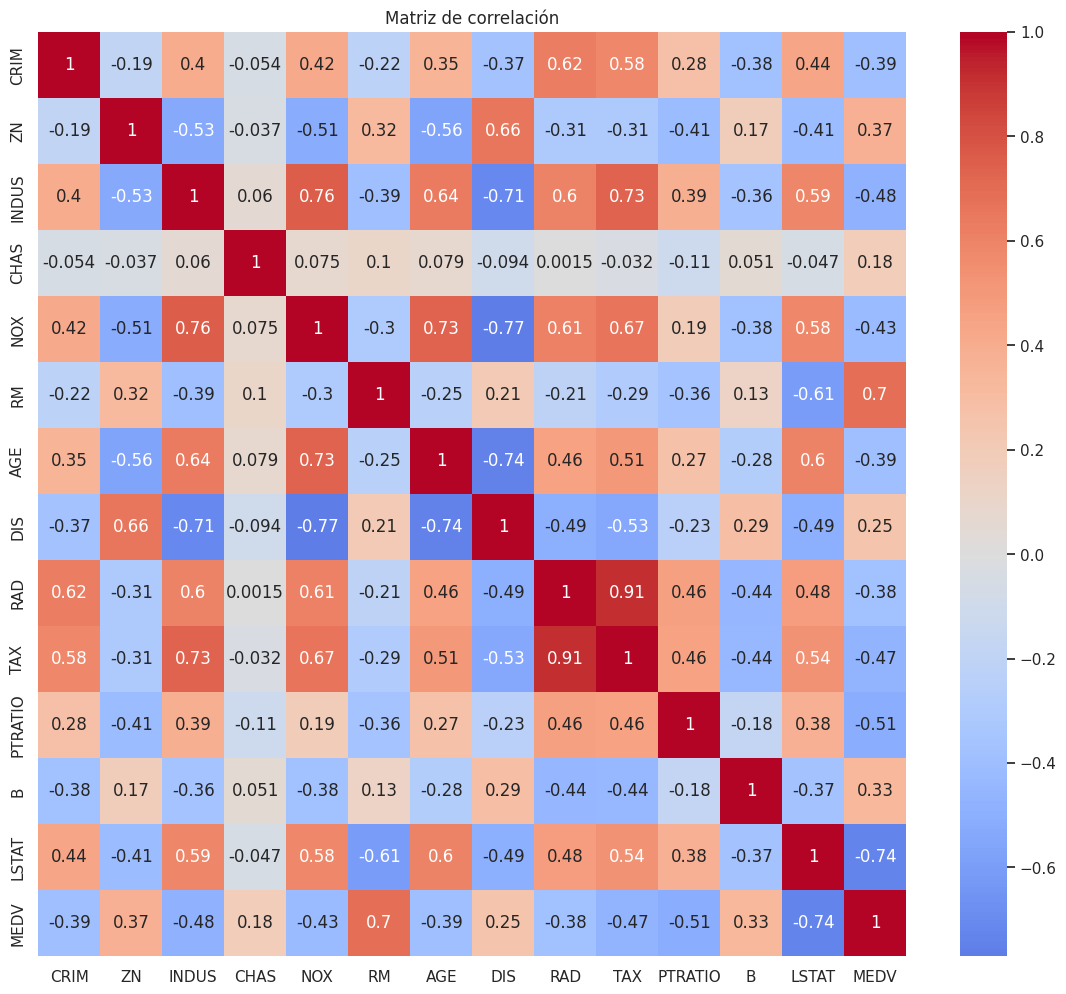

In [26]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


## Análisis de correlación con el target (MEDV)

El heatmap de correlaciones permite visualizar la relación lineal entre cada variable y `MEDV`, así como posibles dependencias entre predictores.

### Variables más correlacionadas con el precio (MEDV):

| Variable | Correlación con MEDV | Interpretación |
|----------|----------------------|----------------|
| **LSTAT** | ≈ -0.74 | Fuerte correlación negativa: a mayor % de población de menor estatus, menor es el valor de la vivienda. |
| **RM** | ≈ +0.70 | Fuerte correlación positiva: más habitaciones promedio → mayor valor. |

Estas dos variables confirman visualmente lo observado en los scatter plots y se perfilan como las más influyentes para un modelo de regresión.

---

### Otras correlaciones moderadas:

| Variable | Correlación estimada | Observaciones |
|----------|----------------------|--------------|
| **PTRATIO** | ≈ -0.51 | A mayor relación alumno/profesor, menor precio en la zona. |
| **INDUS** | ≈ -0.48 | Mayor proporción de terrenos industriales → menor valor. |
| **TAX** | ≈ -0.47 | Mayor tasa impositiva → menor valor (posible efecto indirecto). |
| **NOX** | ≈ -0.43 | Mayor contaminación ambiental → menor valor. |

---

### Variables con correlación débil respecto a MEDV:

- `AGE`, `DIS`, `B`, `RAD`, `ZN`, `CHAS` muestran correlaciones bajas y pueden aportar menos para un modelo estrictamente lineal, aunque podrían jugar roles complementarios o no lineales.

---

### Posible multicolinealidad a considerar:

Se identifican correlaciones fuertes entre predictores:
- `RAD` y `TAX`: ≈ 0.91
- `INDUS` y `NOX`: ≈ 0.76
- `DIS` y `NOX`: ≈ -0.77

Esto sugiere que un modelo lineal sin regularización podría tener problemas por colinealidad entre predictores. Más adelante podríamos considerar:
- Regularización (`Ridge`, `Lasso`)  
- Árboles de decisión o modelos basados en boosting  
- Reducción de dimensionalidad (PCA) si fuera necesario  

---
`LSTAT` y `RM` son los principales candidatos para explicar la variabilidad en `MEDV`. Dado que las relaciones parecen lineales (al menos parcialmente), comenzar con un modelo de regresión lineal como baseline está justificado. Posteriormente, se pueden probar modelos no lineales para capturar efectos más complejos.
